In [63]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

## Preprocessing

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/submission.csv')

In [3]:
df_all = pd.concat([df_train, df_test])
df_all

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,id
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,1.0,NaN
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,1.0,NaN
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,1.0,NaN
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,1.0,NaN
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,NaN,...,NaN,0,0,NaN,NaN,NaN,NaN,97,NaN,13855.0
5267,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,NaN,...,NaN,0,0,NaN,NaN,NaN,NaN,438,NaN,7979.0
5268,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,NaN,12887.0
5269,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,NaN,NaN,429,NaN,17530.0


In [5]:
col = ['customer_country', 'customer_idx', 'customer_job', 'product_category', 'product_subcategory', 'product_modelname', 'customer_country.1', 'expected_timeline', 'business_area', 'business_subarea', 'lead_owner']
df_all.drop(columns=col, inplace = True)

In [6]:
df_all.isnull().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       48214
customer_idx                   0
customer_type              45418
enterprise                     0
historical_existing_cnt    49539
id_strategic_ver           60533
it_strategic_ver           63396
idit_strategic_ver         59359
customer_job               20172
lead_desc_length               0
inquiry_type                2233
product_category           21232
product_subcategory        54542
product_modelname          54779
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          33271
ver_cus                        0
ver_pro                        0
ver_win_rate_x             43780
ver_win_ratio_per_bu       47360
business_area              43780
business_subarea           57228
lead_owner                     0
is_converted                5271
id                         59299
dtype: int

In [6]:
df_all['bant_submit'].unique()

array([1.  , 0.75, 0.5 , 0.25, 0.  ])

In [7]:
df_all['business_unit'].unique()

array(['AS', 'ID', 'IT', 'Solution', 'CM'], dtype=object)

<Axes: >

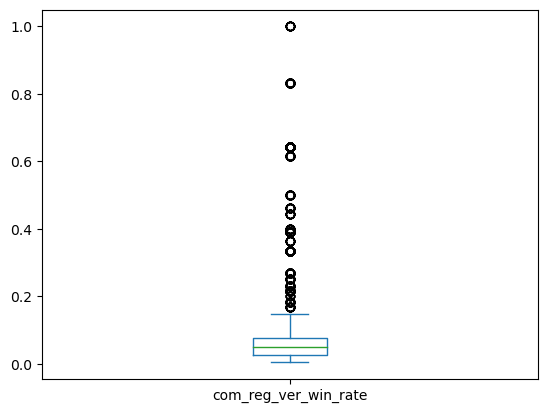

In [11]:
df_all['com_reg_ver_win_rate'].plot(kind = 'box')

In [12]:
df_all['com_reg_ver_win_rate'].fillna(0, inplace = True)

In [15]:
df_all['customer_type'] = df_all['customer_type'].str.lower()
df_all['customer_type'] = df_all['customer_type'].replace(['etc.', 'other', 'others'], 'etc')
df_all['customer_type'] = df_all['customer_type'].replace(['end-customer', 'end customer', 'end-user'], 'end_user')
df_all['customer_type'] = df_all['customer_type'].replace(['specifier/ influencer', 'specifier / influencer'], 'influencer')
df_all['customer_type'] = df_all['customer_type'].replace(['homeowner', 'home owner'], 'home_owner')
df_all['customer_type'] = df_all['customer_type'].replace(['software/solution provider', 'software / solution provider'], 'solution_provider')

# 값의 빈도 계산
value_counts = df_all['customer_type'].value_counts()

# 10개 미만인 값들을 식별
values_to_replace = value_counts[value_counts < 100].index

# 해당 값들을 'etc'로 대체
df_all['customer_type'] = df_all['customer_type'].apply(lambda x: 'etc' if x in values_to_replace else x)

In [17]:
df_all['customer_type'].fillna('etc', inplace = True)

In [18]:
df_all['customer_type'].value_counts()

customer_type
etc                     45675
end_user                13105
influencer               3356
channel partner          1695
service partner           447
solution eco-partner      292
Name: count, dtype: int64

In [19]:
df_all['enterprise'].unique()

array(['Enterprise', 'SMB'], dtype=object)

In [22]:
df_all['historical_existing_cnt'].fillna(0, inplace = True)
df_all[['it_strategic_ver', 'id_strategic_ver', 'idit_strategic_ver']] = df_all[['it_strategic_ver', 'id_strategic_ver', 'idit_strategic_ver']].fillna(0)

In [30]:
df_all['inquiry_type'] = df_all['inquiry_type'].str.lower()
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['etc.', 'other', 'other_', 'others'], 'etc')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['quotation or purchase consultation', 'request for quotation or purchase', 'quotation_or_purchase_consultation', 'purchase or quotation', 'quotation_'], 'quotation_or_purchase_consultation')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['usage or technical consultation', 'technical consultation', 'request for technical consulting', 'usage_or_technical_consultation', 'technical_consultation', 'technical'], 'usage or technical consultation')

In [33]:
# 값의 빈도 계산
value_counts = df_all['inquiry_type'].value_counts()

# 100개 미만인 값들을 식별
values_to_replace = value_counts[value_counts < 1000].index

# 해당 값들을 'etc'로 대체
df_all['inquiry_type'] = df_all['inquiry_type'].apply(lambda x: 'etc' if x in values_to_replace else x)

In [35]:
df_all['inquiry_type'].fillna('etc', inplace = True)

In [36]:
df_all['inquiry_type'].value_counts()

inquiry_type
quotation_or_purchase_consultation    45844
sales inquiry                          9981
etc                                    5585
usage or technical consultation        1855
product information                    1305
Name: count, dtype: int64

In [44]:
df_all['customer_position'] = df_all['customer_position'].replace(['other', 'others', 'none'], 'etc')
value_counts = df_all['customer_position'].value_counts()
values_to_replace = value_counts[value_counts < 1000].index
df_all['customer_position'] = df_all['customer_position'].apply(lambda x: 'etc' if x in values_to_replace else x)
df_all['customer_position'].fillna('etc', inplace = True)

In [46]:
df_all['customer_position'].value_counts()

customer_position
etc                  33787
manager               8943
ceo/founder           8577
director              5186
associate/analyst     2876
partner               2760
entry level           2441
Name: count, dtype: int64

In [47]:
df_all['response_corporate'].unique()

array(['LGEPH', 'LGEIL', 'LGEAF', 'LGESJ', 'LGESL', 'LGESP', 'LGEGF',
       'LGESA', 'LGEUS', 'LGECB', 'LGEMS', 'LGEEG', 'LGEEF', 'LGEAP',
       'LGEIN', 'LGEUK', 'LGEKR', 'LGEPS', 'LGECI', 'LGECL', 'LGETK',
       'LGELF', 'LGEPT', 'LGEPR', 'LGEDG', 'LGERO', 'LGEMK', 'LGEPL',
       'LGECZ', 'LGEES', 'LGEAR', 'LGEHK', 'LGEML', 'LGEJP', 'LGEHS',
       'LGEAS', 'LGEYK', 'LGEIS', 'LGEBN', 'LGEFS', 'LGESW', 'LGEMC',
       'LGEAG', 'LGEEB', 'LGETH', 'LGEVH', 'LGECH', 'LGELA', 'LGETT',
       'LGERA', 'LGEUR', 'LGEIR', 'LGEBT'], dtype=object)

In [48]:
df_all['ver_win_rate_x'].fillna(0, inplace = True)
df_all['ver_win_ratio_per_bu'].fillna(0, inplace = True)

In [49]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [50]:
df_all.isnull().sum()

bant_submit                    0
business_unit                  0
com_reg_ver_win_rate           0
customer_type                  0
enterprise                     0
historical_existing_cnt        0
id_strategic_ver               0
it_strategic_ver               0
idit_strategic_ver             0
lead_desc_length               0
inquiry_type                   0
customer_position              0
response_corporate             0
ver_cus                        0
ver_pro                        0
ver_win_rate_x                 0
ver_win_ratio_per_bu           0
is_converted                5271
id                         59299
dtype: int64

In [51]:
# 레이블 인코딩할 칼럼들
label_columns = [
    'business_unit',
    'customer_type',
    'enterprise',
    'response_corporate',
    'inquiry_type',
    'customer_position',
    'response_corporate',
]

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [54]:
df_all.iloc[:len(df_train)]

,bant_submit,business_unit,com_reg_ver_win_rate,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,inquiry_type,customer_position,response_corporate,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,is_converted,id
0,1.00,0,0.066667,1,0,0.0,0.0,0.0,0.0,62,2,3,27,1,0,0.003079,0.026846,1.0,NaN
1,1.00,0,0.066667,1,0,12.0,0.0,0.0,0.0,96,2,1,27,1,0,0.003079,0.026846,1.0,NaN
2,1.00,0,0.088889,1,0,144.0,0.0,0.0,0.0,56,1,6,14,1,0,0.003079,0.026846,1.0,NaN
3,1.00,0,0.088889,1,0,0.0,0.0,0.0,0.0,44,2,1,14,1,0,0.003079,0.026846,1.0,NaN
4,1.00,0,0.088889,3,0,0.0,0.0,0.0,0.0,97,2,6,14,0,0,0.003079,0.026846,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,0,0.000000,1,1,0.0,0.0,0.0,0.0,200,1,3,28,0,0,0.000026,0.028777,0.0,NaN
59295,0.75,0,0.040000,3,0,0.0,0.0,0.0,0.0,70,0,4,50,0,0,0.000026,0.028777,0.0,NaN
59296,0.75,0,0.040000,3,0,0.0,0.0,0.0,0.0,34,0,3,29,0,0,0.000026,0.028777,0.0,NaN
59297,1.00,0,0.040000,2,0,0.0,0.0,0.0,0.0,377,2,4,29,0,0,0.000026,0.028777,0.0,NaN


In [56]:
df_train = df_all.iloc[:len(df_train)]
df_test = df_all.iloc[len(df_train):]

In [90]:
df_train['is_converted'] = df_train['is_converted'].astype(int)

In [59]:
df_train.head()

,bant_submit,business_unit,com_reg_ver_win_rate,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,inquiry_type,customer_position,response_corporate,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,is_converted,id
0,1.0,0,0.066667,1,0,0.0,0.0,0.0,0.0,62,2,3,27,1,0,0.003079,0.026846,1.0,NaN
1,1.0,0,0.066667,1,0,12.0,0.0,0.0,0.0,96,2,1,27,1,0,0.003079,0.026846,1.0,NaN
2,1.0,0,0.088889,1,0,144.0,0.0,0.0,0.0,56,1,6,14,1,0,0.003079,0.026846,1.0,NaN
3,1.0,0,0.088889,1,0,0.0,0.0,0.0,0.0,44,2,1,14,1,0,0.003079,0.026846,1.0,NaN
4,1.0,0,0.088889,3,0,0.0,0.0,0.0,0.0,97,2,6,14,0,0,0.003079,0.026846,1.0,NaN


## modeling

In [91]:
X = df_train.drop(columns = ['is_converted', 'id'])
X_test = df_test.drop(columns = ['is_converted', 'id'])
y = df_train['is_converted']

print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, stratify = y)
print(X_train.shape, X_val.shape)

(59299, 17)
(41509, 17) (17790, 17)


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_val)
print('f1_score :', f1_score(y_val, y_pred))

f1_score : 0.47129695251594617


In [102]:
dt_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(15, 25, 2), 'min_samples_leaf' : np.arange(1, 10, 2)}
grid_dt_clf = GridSearchCV(dt_clf, param_grid, verbose = True, cv = 5, scoring='f1')
grid_dt_clf.fit(X_train, y_train)

print('최적의 파라미터 :',grid_dt_clf.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
최적의 파라미터 : {'max_depth': 17, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0}


In [105]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth =17, min_samples_leaf = 1)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_val)
print('f1_score :', f1_score(y_val, y_pred))

f1_score : 0.49739389426656744


상관관계 확인하고 <br/>
차원축소 (PCA) <br/>
다시 모델링